In [ ]:
library(Seurat)
library(harmony)
library(org.Hs.eg.db)
library(clusterProfiler)
library(ggplot2)
library(RColorBrewer)
library(cowplot)

setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

In [ ]:
readRDS("/media/inspur/AS2150G2/LDK/sclc_metastasis/rds_from_Mr.wang/NSCLC_celltype.rds")-> subset_NSCLC
load("/media/inspur/AS2150G2/LDK/sclc_metastasis/data_out/2.SCLC.filter.rdata")
subset_SCLC <- SCLC.filter; rm(SCLC.filter);

In [184]:
# check metadata
head(subset_NSCLC@meta.data)
table(subset_NSCLC$new_celltype)

head(subset_SCLC@meta.data)
table(subset_SCLC$celltype)

,orig.ident,nCount_RNA,nFeature_RNA,UMAP_1,UMAP_2,Celltype..malignancy.,Celltype..major.lineage.,Celltype..minor.lineage.,seurat_clusters,Sample,TNMstage,Patient,Source,Stage,celltype,percent.mt,RNA_snn_res.0.5,RNA_snn_res.2,new_celltype
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
AAACCTGAGAGGTTGC_BRONCHO_11,BRONCHO_11,3857,1063,-0.8644790,11.2255346,Immune cells,B,B,0,BRONCHO_11,IV,P1011,Tumor,Primary,B,4.900181,1,0,B
AAACCTGAGCAGGTCA_LN_12,LN_12,2069,725,2.5290218,12.4563533,Immune cells,B,B,3,LN_12,I,P2012,Pleural effusion,Primary,B,2.658289,4,3,B
AAACCTGCAAAGTGCG_BRONCHO_11,BRONCHO_11,3773,974,-0.5538845,11.1389285,Immune cells,B,B,0,BRONCHO_11,IV,P1011,Tumor,Primary,B,2.120329,1,0,B
AAACCTGCAATCACAC_LN_11,LN_11,4327,1581,-2.8703646,0.6268116,Immune cells,B,B,8,LN_11,I,P2011,Pleural effusion,Primary,B,2.287959,2,8,NK
AAACCTGCAGCTGGCT_LN_08,LN_08,2983,890,-2.4890813,2.0114900,Immune cells,B,B,5,LN_08,I,P2008,Pleural effusion,Primary,B,1.642642,2,5,CD8T
AAACCTGCAGCTGTTA_LN_08,LN_08,4829,1006,-6.6865880,2.5903159,Immune cells,B,B,1,LN_08,I,P2008,Pleural effusion,Primary,B,3.023400,0,1,CD4Tconv



            B      CD4Tconv          CD8T            DC            NK 
        14225         24306          4191          3851          2340 
   Mono/Macro        Plasma    Epithelial megakaryocyte 
         1978          2276          3121            77 

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,percent.HB,RNA_snn_res.0.8,seurat_clusters,celltype
,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>
S1_AAACGCTCATTAGGCT-1,S1,38063.560,6485,9.2669949,S1,0,12,12,tumor
S1_AAACGCTGTACGACAG-1,S1,22451.609,4464,11.2228054,S1,0,20,20,tumor
S1_AAACGCTGTTGTGCCG-1,S1,37911.320,5923,13.1976097,S1,0,12,12,tumor
S1_AAAGAACGTAATTGGA-1,S1,3396.745,1552,5.2367781,S1,0,7,7,CD8T
S1_AAAGAACTCAACACCA-1,S1,21211.397,4539,0.8056408,S1,0,0,0,tumor
S1_AAAGGATAGATTAGAC-1,S1,47046.122,6448,3.9217880,S1,0,1,1,tumor



         tumor           CD4T      Monocytes    Neutrophils           CD8T 
         11903           2387           2163           2447           1511 
            NK        B cells Megakaryocytes    Macrophages             DC 
          1953            798            257            378            165 
        Plasma 
           119 

In [185]:
subset(subset_NSCLC, new_celltype =="NK")->NSCLC_NK
subset(subset_SCLC, celltype =="NK")->SCLC_NK
NSCLC_NK[["CT"]]<-"NSCLC"
SCLC_NK[["CT"]]<-"SCLC"

In [186]:
NKcell <- merge(NSCLC_NK, y = SCLC_NK, project = "NK")

In [187]:
library(Seurat)
NKcell <- NormalizeData(NKcell, normalization.method = "LogNormalize", scale.factor = 10000)
NKcell <- FindVariableFeatures(NKcell, selection.method = "vst", nfeatures = 800)
NKcell <- ScaleData(NKcell, features = VariableFeatures(object = NKcell))
NKcell <- RunPCA(NKcell, npcs = 35, verbose = FALSE, features = VariableFeatures(object = NKcell),seed.use=42)

Centering and scaling data matrix



In [188]:
# check NKcell metadata
head(NKcell@meta.data)
table(NKcell$orig.ident)
table(NKcell$CT)


,orig.ident,nCount_RNA,nFeature_RNA,UMAP_1,UMAP_2,Celltype..malignancy.,Celltype..major.lineage.,Celltype..minor.lineage.,seurat_clusters,Sample,⋯,Stage,celltype,percent.mt,RNA_snn_res.0.5,RNA_snn_res.2,new_celltype,CT,sample,percent.HB,RNA_snn_res.0.8
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
AAACCTGCAATCACAC_LN_11,LN_11,4327,1581,-2.8703646,0.6268116,Immune cells,B,B,8,LN_11,⋯,Primary,B,2.287959,2,8,NK,NSCLC,NA,NA,NA
AAACGGGTCGTATCAG_EBUS_19,EBUS_19,4195,1353,-0.9289408,1.4892186,Immune cells,B,B,8,EBUS_19,⋯,Metastatic,B,2.836710,2,8,NK,NSCLC,NA,NA,NA
AACGTTGAGCCGCCTA_LN_07,LN_07,5953,1597,-2.2953970,0.6867144,Immune cells,B,B,8,LN_07,⋯,Primary,B,5.140265,2,8,NK,NSCLC,NA,NA,NA
AACGTTGTCTTGTTTG_LN_11,LN_11,11038,2209,-2.2075674,-0.6354010,Immune cells,B,B,8,LN_11,⋯,Primary,B,3.705381,2,8,NK,NSCLC,NA,NA,NA
AAGTCTGAGCCCGAAA_LN_01,LN_01,2163,802,-2.0837459,-0.6525913,Immune cells,B,B,8,LN_01,⋯,Primary,B,2.820157,2,8,NK,NSCLC,NA,NA,NA
AATCGGTCACCTATCC_LN_02,LN_02,7900,1999,-0.1800931,0.7362569,Immune cells,B,B,8,LN_02,⋯,Primary,B,3.025316,2,8,NK,NSCLC,NA,NA,NA



BRONCHO_11    EBUS_10    EBUS_12    EBUS_13    EBUS_15    EBUS_19    EBUS_51 
        47        156        104         61        154        315        446 
     LN_01      LN_02      LN_03      LN_04      LN_05      LN_06      LN_07 
        65         75         93         93        116         58        189 
     LN_08      LN_11      LN_12         S1         S2         S3         S4 
       108        134        126         71        208       1165         24 
        S5         S6         S7 
       202        237         46 


NSCLC  SCLC 
 2340  1953 

In [189]:
library(harmony)
NKcell <- RunHarmony(NKcell, c("orig.ident","CT"),theta=c(2,1.5),lambda=c(1,1))
# NKcell <- RunHarmony(NKcell, c("orig.ident","CT"), theta=c(2,1),lambda=c(1,1))


Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


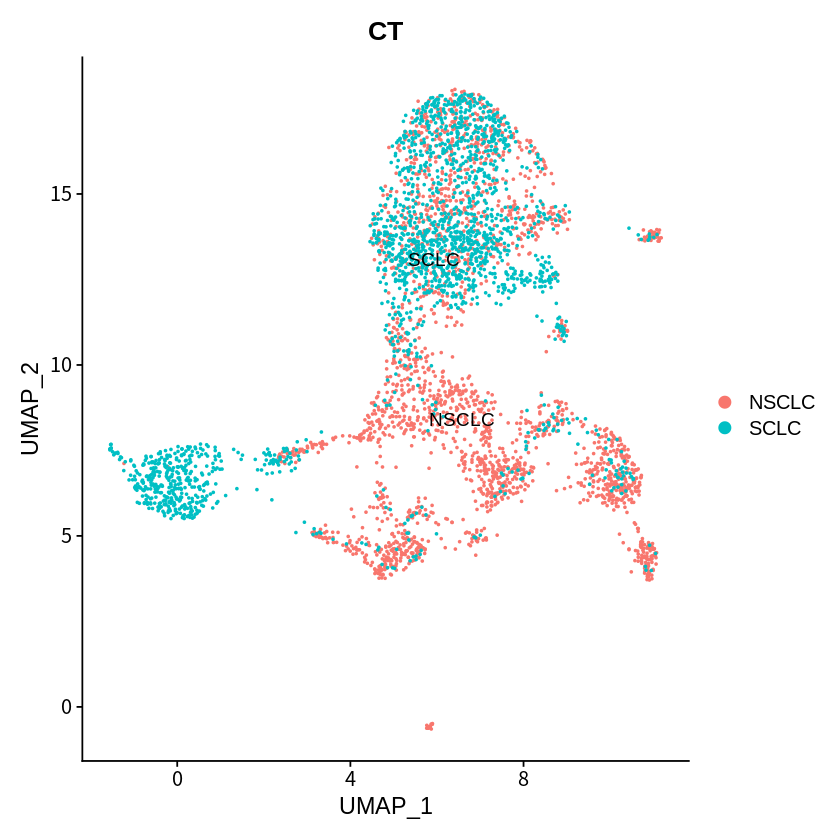

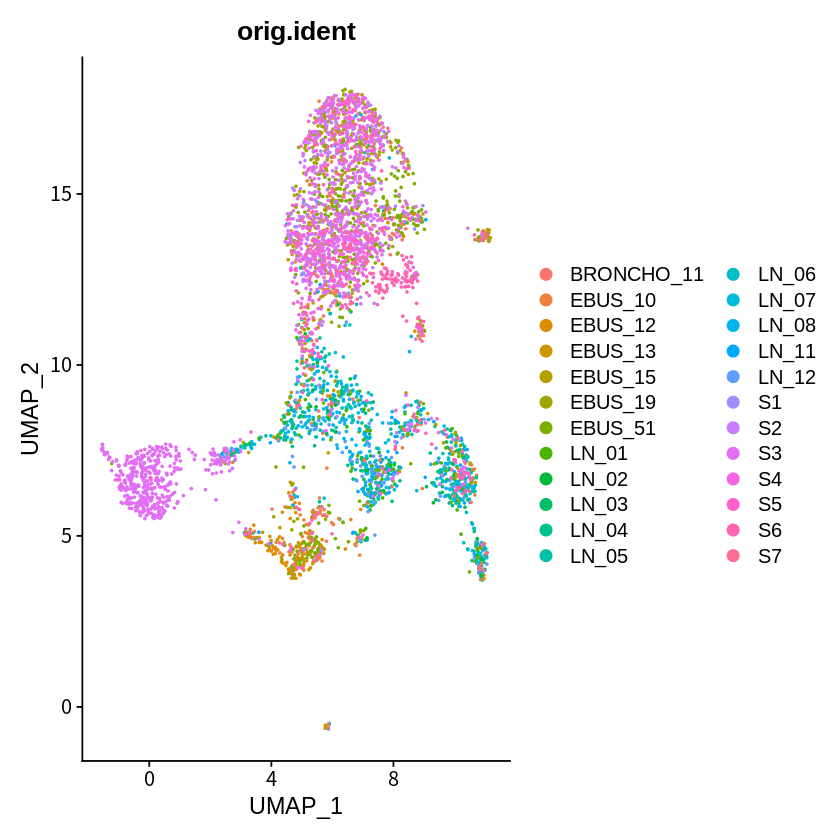

In [190]:
NKcell <- RunUMAP(NKcell, umap.method = 'umap-learn',reduction = "harmony", dims = 1:35, metric="correlation", seed.use = 2022)

DimPlot(NKcell, reduction = "umap",label=T,group.by="CT")
DimPlot(NKcell, reduction = "umap",label=F,group.by="orig.ident")

In [191]:
CT2<-rep(NA,dim(NKcell@meta.data)[1])
CT2[which(NKcell@meta.data[,1] %in% c("LN_01","LN_02","LN_03","LN_04","LN_05","LN_06","LN_07","LN_08","LN_11","LN_12"))]<-"Normal"

CT2[which(NKcell@meta.data[,1] %in% c("EBUS_10","BRONCHO_11","EBUS_12","EBUS_13","EBUS_15","EBUS_19","EBUS_51"))]<-"NSCLC_NK"

CT2[which(NKcell@meta.data[,1] %in% c("S1","S2","S3","S4","S5","S6","S7"))]<-"SCLC_NK"

NKcell[["CT2"]]<-CT2

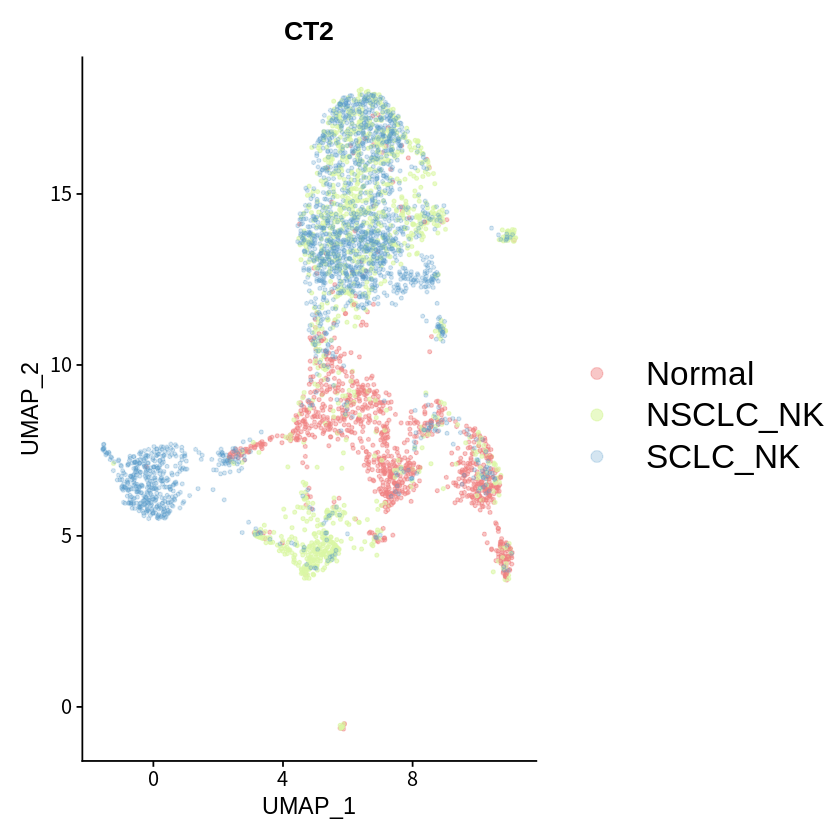

In [192]:
DimPlot(NKcell, reduction = "umap",label=F,group.by="CT2",pt.size=0.8, cols = c("#F0808070", "#DAF7A699", "#5499C740")) + 
theme(legend.key.height = unit(25,"pt"),legend.key.width = unit(45,"pt")) +
# theme(legend.key.size = unit(55,"pt"))+
theme(legend.text=element_text(size=20))


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4293
Number of edges: 218359

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 10
Elapsed time: 0 seconds


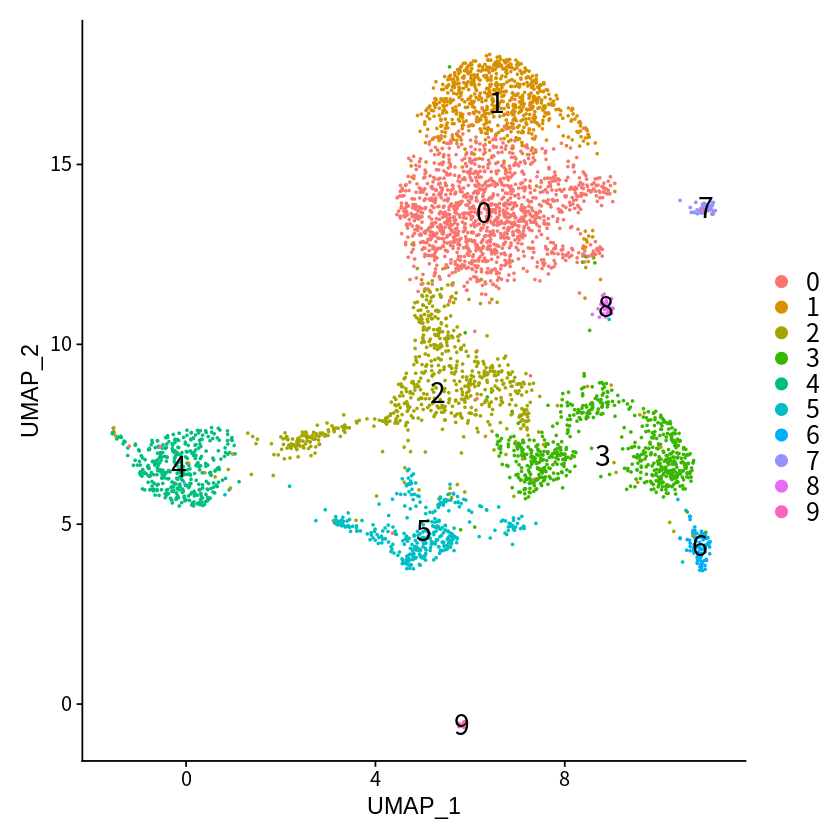

In [193]:
NKcell <- FindNeighbors(NKcell,reduction="harmony", dims = 1:35)
NKcell <- FindClusters(NKcell, resolution = 0.3)
DimPlot(NKcell, reduction = "umap",label=T, label.size = 6) + theme(legend.text=element_text(size=15))

In [194]:
head(NKcell@meta.data)
table(NKcell$seurat_clusters)

,orig.ident,nCount_RNA,nFeature_RNA,UMAP_1,UMAP_2,Celltype..malignancy.,Celltype..major.lineage.,Celltype..minor.lineage.,seurat_clusters,Sample,⋯,percent.mt,RNA_snn_res.0.5,RNA_snn_res.2,new_celltype,CT,sample,percent.HB,RNA_snn_res.0.8,CT2,RNA_snn_res.0.3
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>
AAACCTGCAATCACAC_LN_11,LN_11,4327,1581,-2.8703646,0.6268116,Immune cells,B,B,2,LN_11,⋯,2.287959,2,8,NK,NSCLC,NA,NA,NA,Normal,2
AAACGGGTCGTATCAG_EBUS_19,EBUS_19,4195,1353,-0.9289408,1.4892186,Immune cells,B,B,0,EBUS_19,⋯,2.836710,2,8,NK,NSCLC,NA,NA,NA,NSCLC_NK,0
AACGTTGAGCCGCCTA_LN_07,LN_07,5953,1597,-2.2953970,0.6867144,Immune cells,B,B,3,LN_07,⋯,5.140265,2,8,NK,NSCLC,NA,NA,NA,Normal,3
AACGTTGTCTTGTTTG_LN_11,LN_11,11038,2209,-2.2075674,-0.6354010,Immune cells,B,B,3,LN_11,⋯,3.705381,2,8,NK,NSCLC,NA,NA,NA,Normal,3
AAGTCTGAGCCCGAAA_LN_01,LN_01,2163,802,-2.0837459,-0.6525913,Immune cells,B,B,3,LN_01,⋯,2.820157,2,8,NK,NSCLC,NA,NA,NA,Normal,3
AATCGGTCACCTATCC_LN_02,LN_02,7900,1999,-0.1800931,0.7362569,Immune cells,B,B,9,LN_02,⋯,3.025316,2,8,NK,NSCLC,NA,NA,NA,Normal,9



   0    1    2    3    4    5    6    7    8    9 
1363  716  658  631  370  355   96   49   37   18 

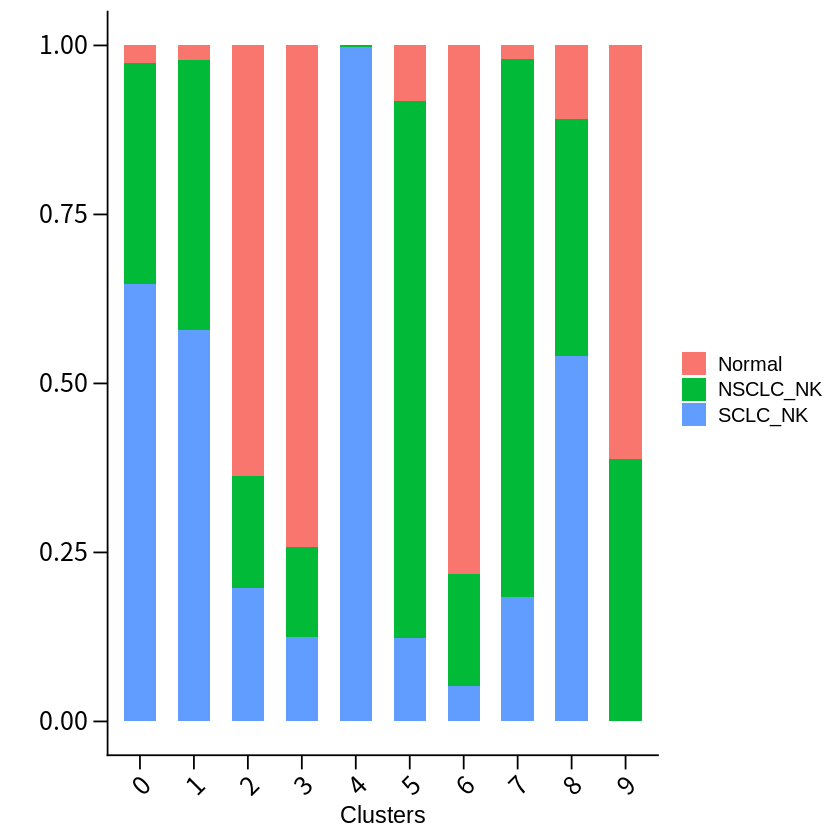

In [195]:
library(cowplot)
tab <- data.frame(NKcell$CT2,NKcell$seurat_clusters)
colnames(tab) <- c("cell.type", "Clusters")

  ggplot(tab) + aes(x = factor(Clusters), fill = cell.type) + theme_bw()+theme_cowplot()+
  geom_bar(position = "fill",width=0.6) + labs(x="Clusters",y="")+
  theme(axis.text.y = element_text(size=15),axis.text.x = element_text(size=15),legend.title=element_blank(),
        axis.ticks.length = unit(0.3,"cm")) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

In [196]:
# c("Mixture","Mixture","Normal_predominant","Normal_predominant","SCLC_predominant","NSCLC_predominant","Normal_predominant",
# "Mixture","SCLC_predominant","Normal_predominant")->cell_label
c("Mixture",	"Mixture",	"Normal_predominant",	"Normal_predominant",	"SCLC_predominant",	"NSCLC_predominant",	"Normal_predominant",	"Mixture",	"Mixture",	"NSCLC_predominant")->cell_label

names(cell_label)<-levels(NKcell)

NKcell <- RenameIdents(NKcell, cell_label)
NKcell[["mix_label"]]<-Idents(NKcell)

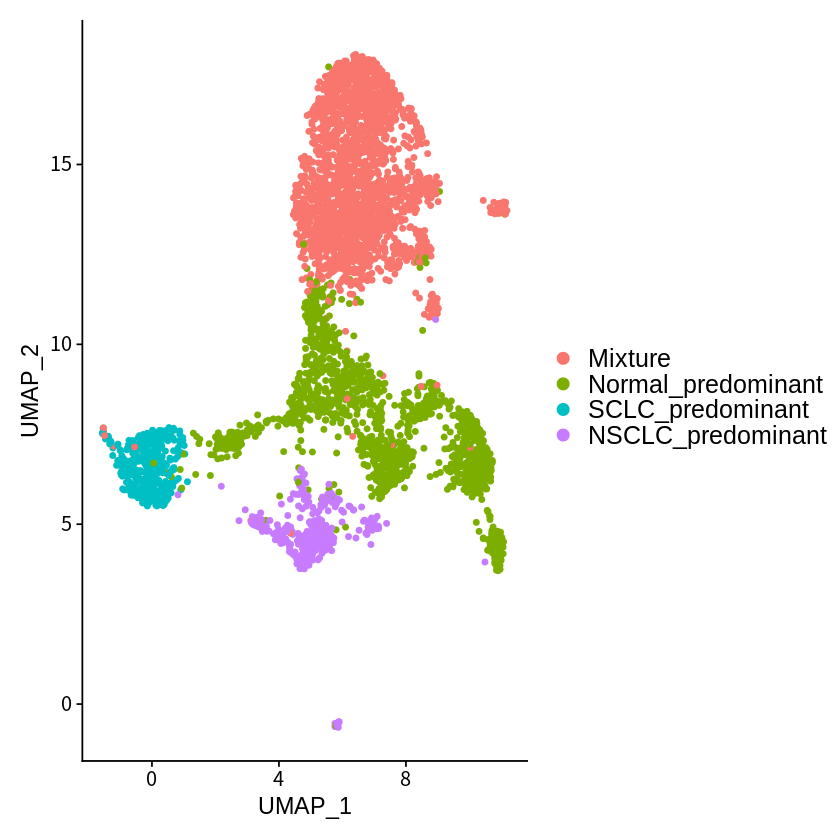

In [197]:
DimPlot(NKcell, pt.size=1.3) +
# theme(legend.key.size = unit(35,"pt"))+
theme(legend.text=element_text(size=15))

xxx<-DimPlot(NKcell)
unique(ggplot_build(xxx)$data[[1]][,c("group","colour")])->color_list

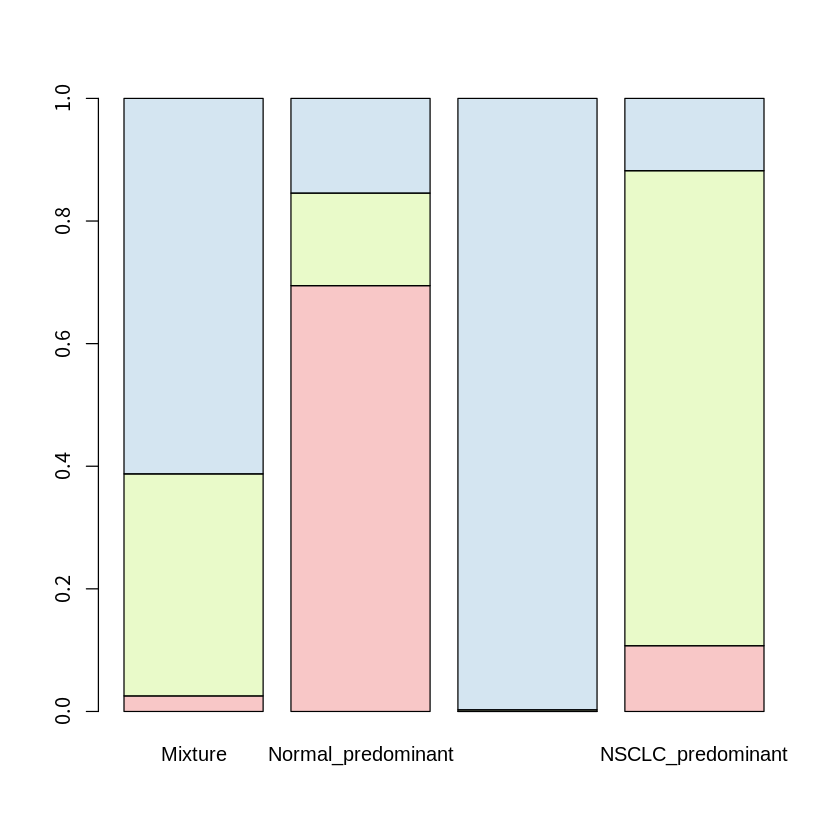

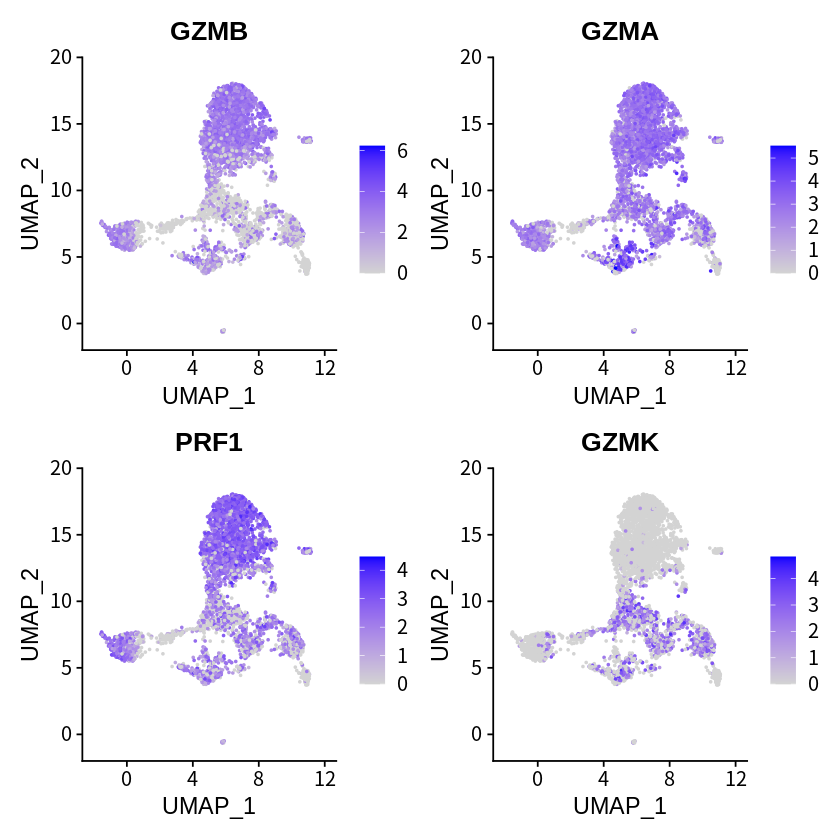

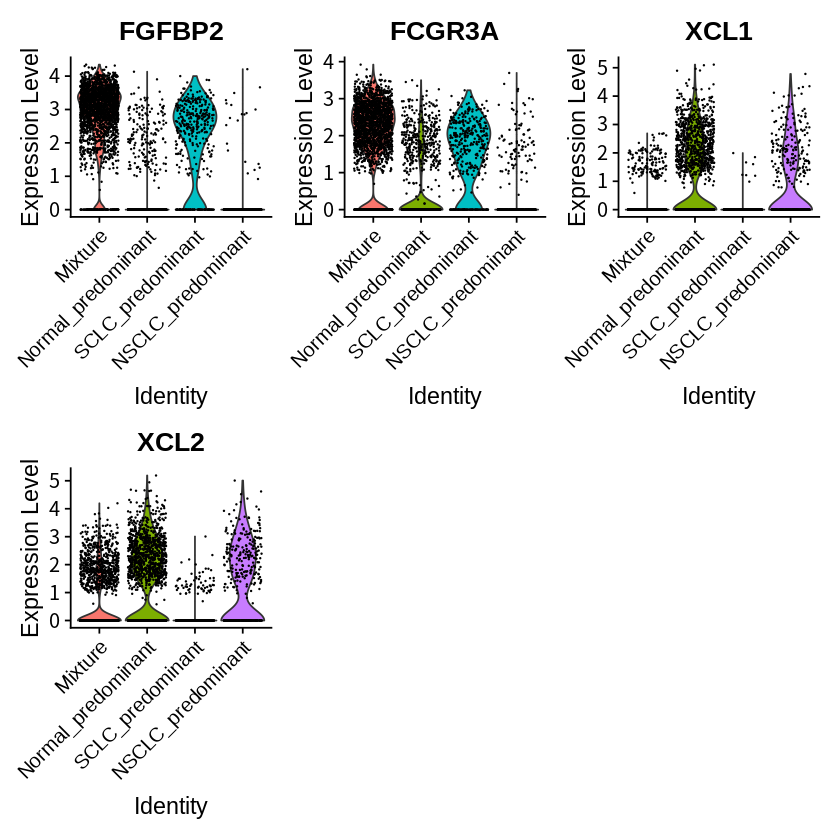

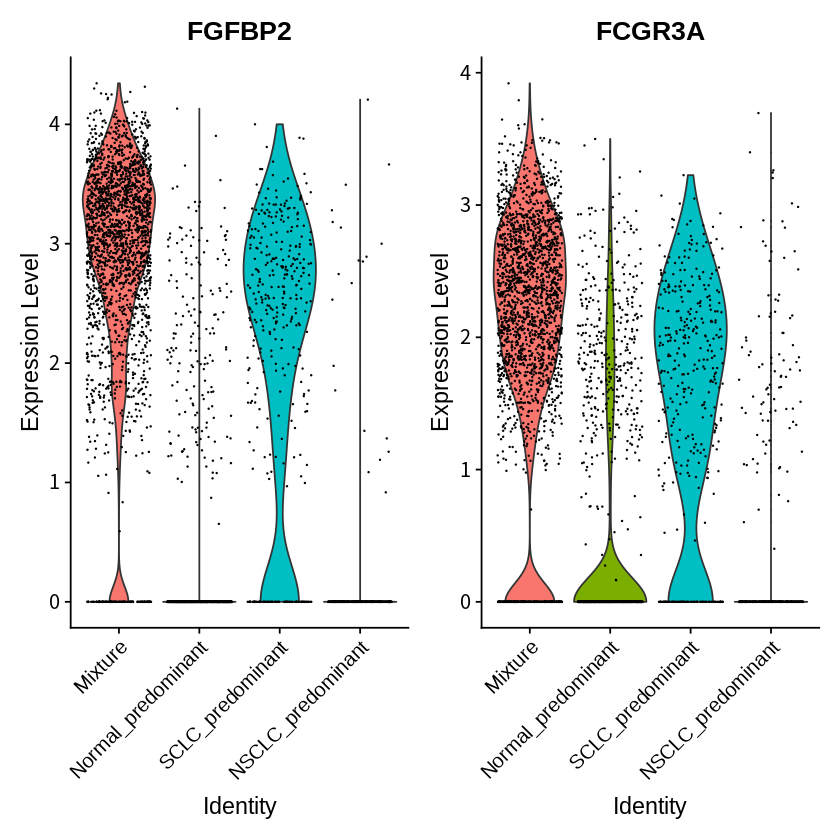

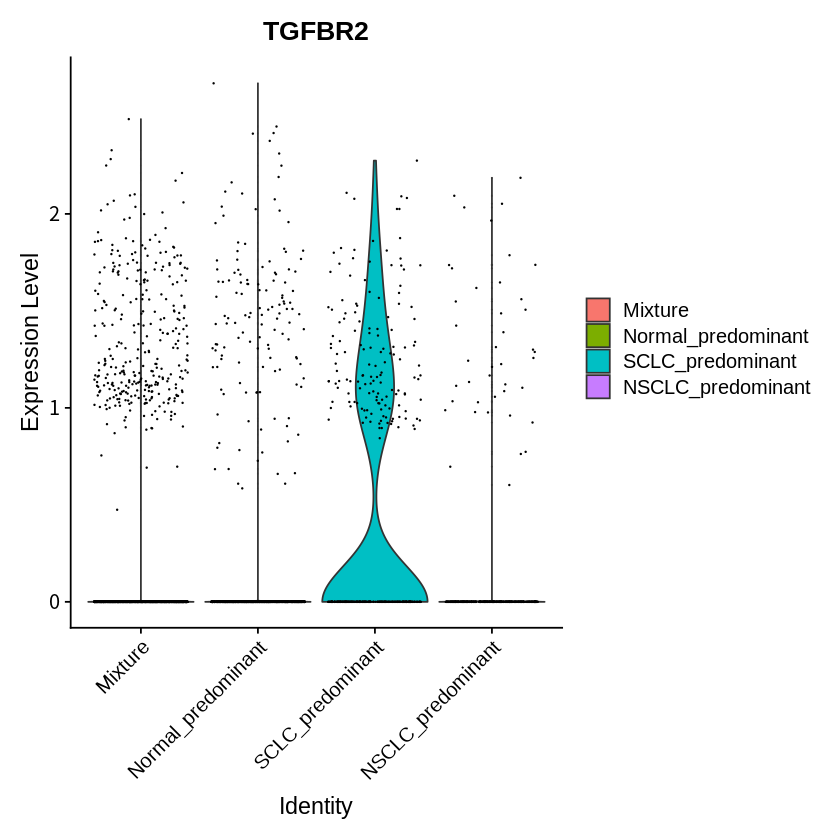

In [198]:
table(NKcell@meta.data[,c("mix_label","CT2")])->stat
barplot(t(stat/rowSums(stat)),col= c("#F0808070", "#DAF7A699", "#5499C740"))
FeaturePlot(NKcell,c("GZMB","GZMA","PRF1","GZMK"))
VlnPlot(NKcell,c( "FGFBP2", "FCGR3A","XCL1","XCL2"))
VlnPlot(NKcell,c( "FGFBP2", "FCGR3A"))
VlnPlot(NKcell,c( "TGFBR2"))

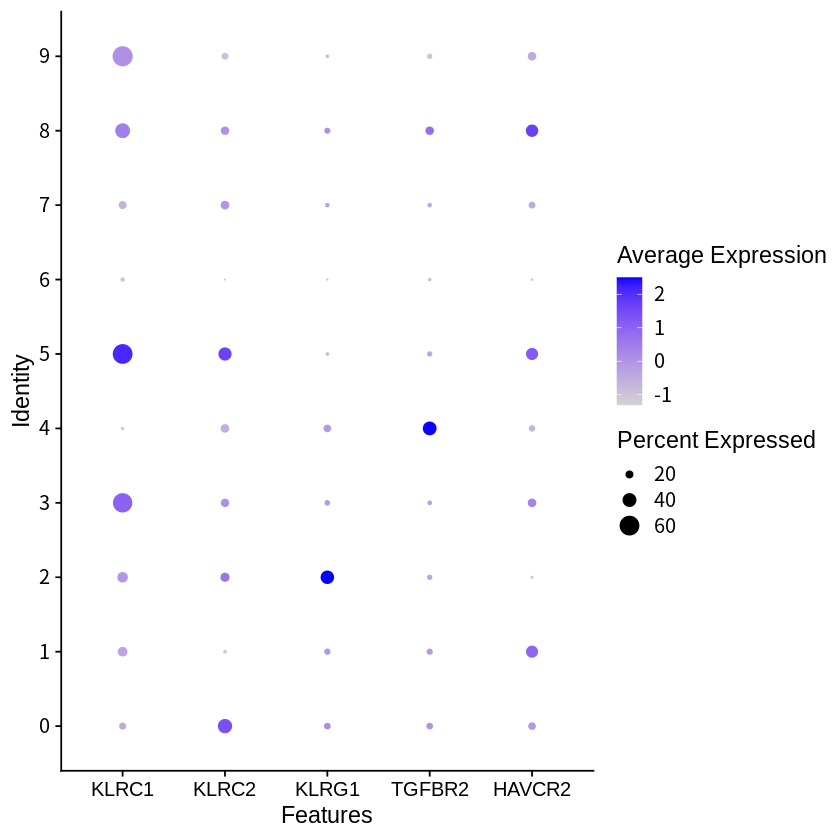

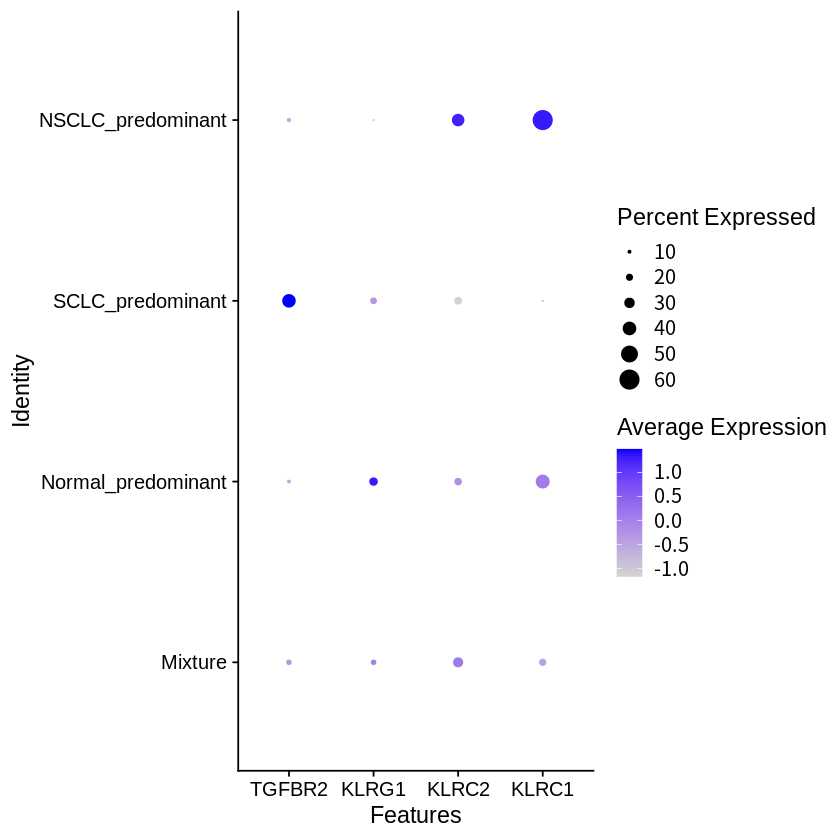

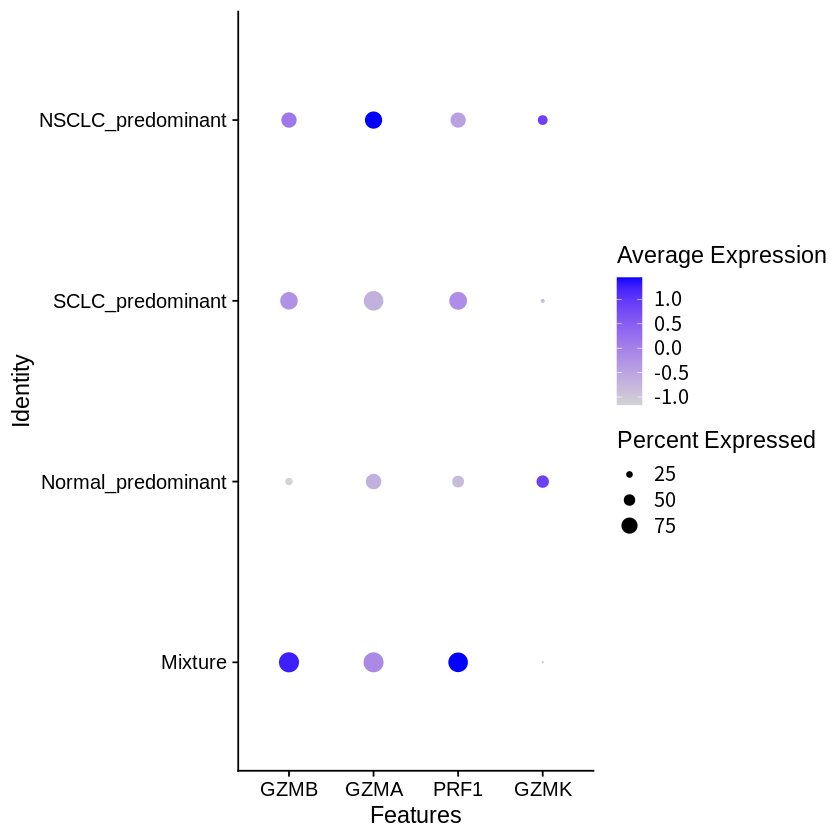

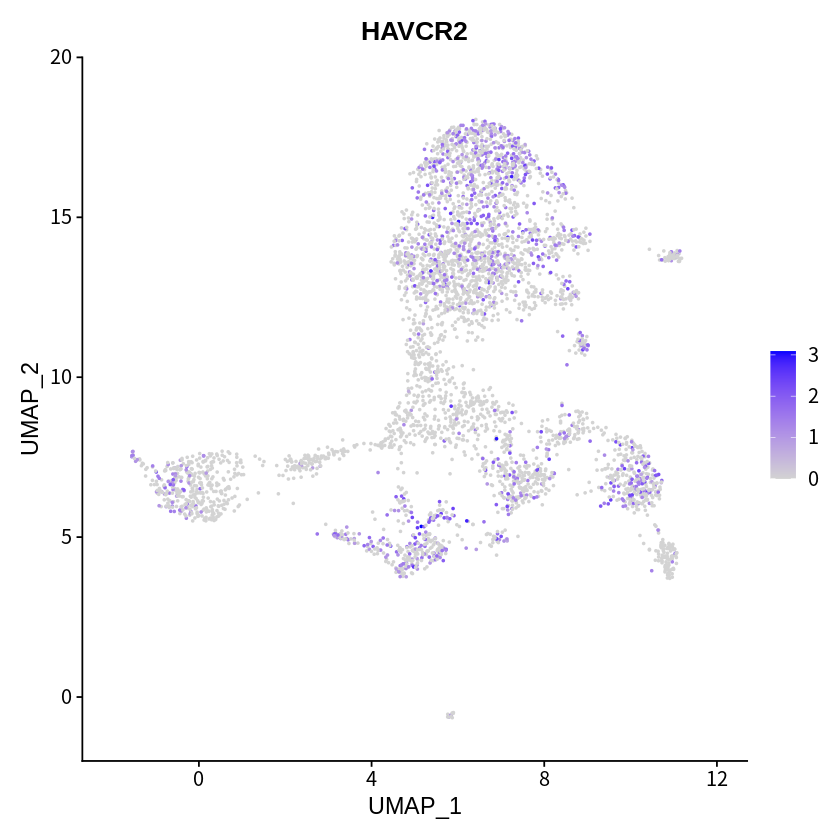

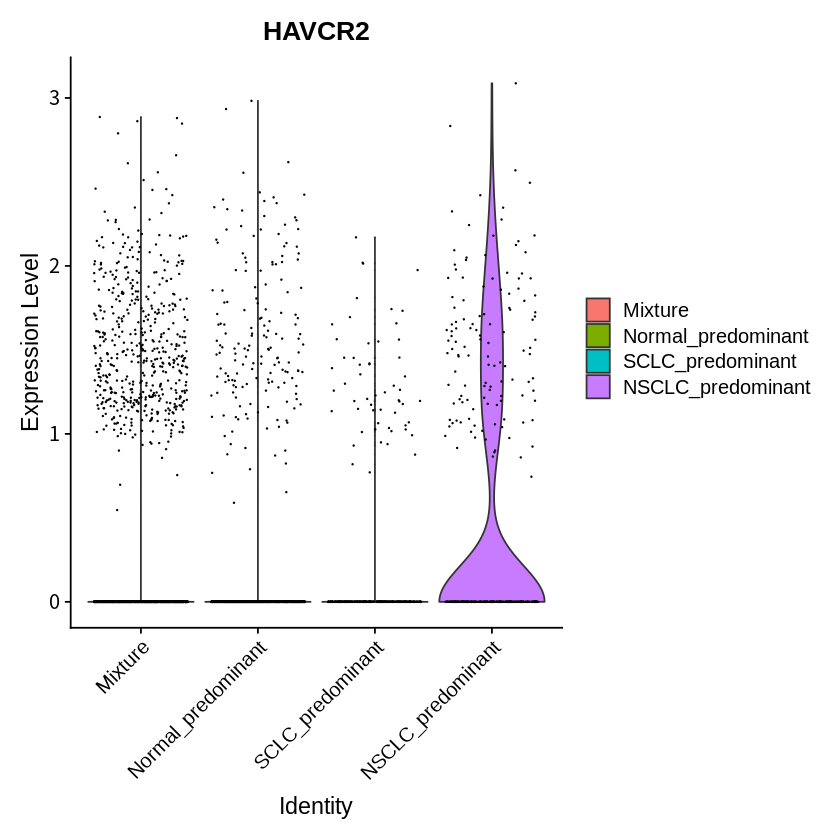

In [200]:
DotPlot(NKcell,features=c("KLRC1","KLRC2","KLRG1","TGFBR2","HAVCR2"),group.by="seurat_clusters",dot.scale=5)
DotPlot(NKcell,features=c("TGFBR2","KLRG1","KLRC2","KLRC1"),group.by="mix_label",dot.scale=5)
DotPlot(NKcell,features=c("GZMB","GZMA","PRF1","GZMK"),group.by="mix_label",dot.scale=5)


FeaturePlot(NKcell,c("HAVCR2") )
VlnPlot(NKcell,c("HAVCR2"))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4293
Number of edges: 218359

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 10
Elapsed time: 0 seconds


       seurat_clusters
CT        0   1   2   3   4   5   6   7   8   9
  NSCLC 481 301 528 552   1 311  91  40  17  18
  SCLC  882 415 130  79 369  44   5   9  20   0

          seurat_clusters
CT2          0   1   2   3   4   5   6   7   8   9
  Normal    35  15 419 468   0  29  75   1   4  11
  NSCLC_NK 446 286 109  84   1 282  16  39  13   7
  SCLC_NK  882 415 130  79 369  44   5   9  20   0

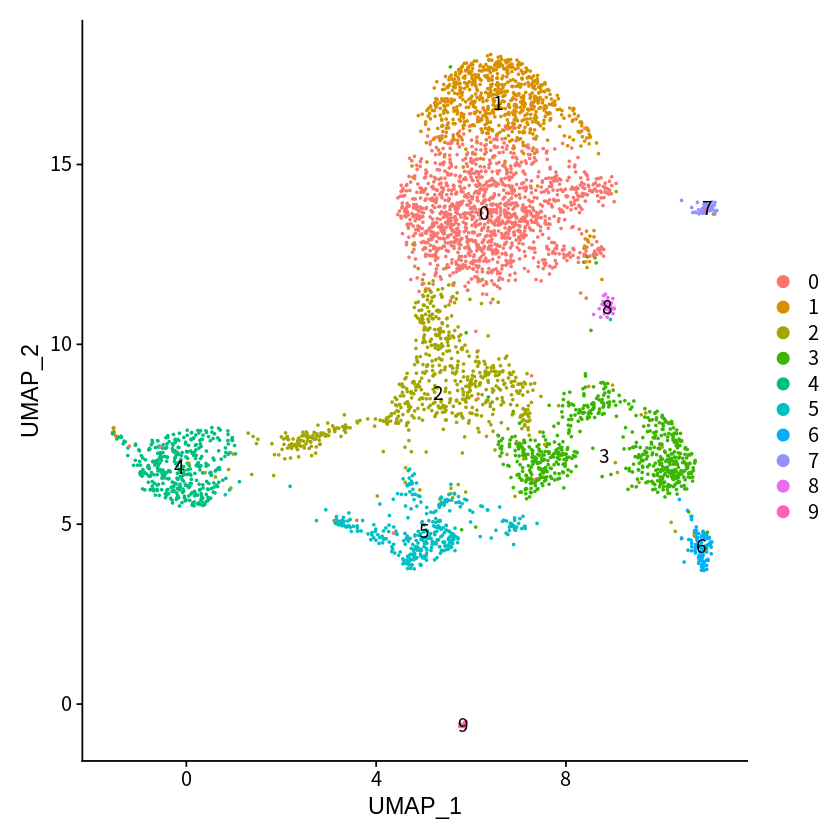

In [201]:
NKcell <- FindNeighbors(NKcell,reduction="harmony", dims = 1:35)
NKcell <- FindClusters(NKcell, resolution = 0.3)
DimPlot(NKcell, reduction = "umap",label=T)
table(NKcell@meta.data[,c("CT","seurat_clusters")])

table(NKcell@meta.data[,c("CT2","seurat_clusters")])

In [ ]:
FindMarkers(NKcell, ident.1=c(5),ident.2=c(4), group.by="seurat_clusters", )->gg

In [ ]:
library(org.Hs.eg.db)
library(clusterProfiler)


rownames(gg[ which(gg[,"avg_logFC"]> 0 & gg[,"p_val_adj"]<0.05),]) ->cand_gene
cand_gene
go <- enrichGO(cand_gene ,OrgDb = org.Hs.eg.db, ont='BP',pAdjustMethod = 'fdr',pvalueCutoff = 0.05,       qvalueCutoff = 0.2 , keyType = 'SYMBOL')

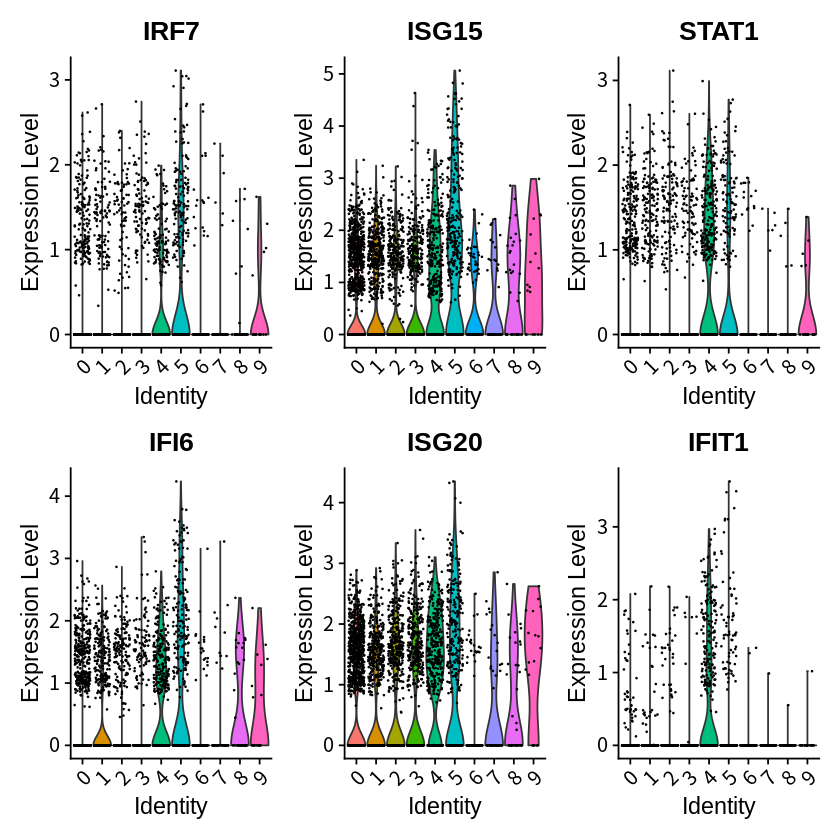

In [202]:
VlnPlot(NKcell,c( "IRF7","ISG15","STAT1","IFI6","ISG20","IFIT1"),pt.size=0.1)

In [203]:
c("ACVR1","APC","ARID4B","BCAR3","BMP2","BMPR1A","BMPR2","CDH1","CDK9","CDKN1C","CTNNB1","ENG","FKBP1A","FNTA","FURIN","HDAC1",
  "HIPK2","ID1","ID2","ID3","IFNGR2","JUNB","KLF10","LEFTY2","LTBP2","MAP3K7","NCOR2","NOG","PMEPA1","PPM1A","PPP1CA",
  "PPP1R15A","RAB31","RHOA","SERPINE1","SKI","SKIL","SLC20A1","SMAD1","SMAD3","SMAD6","SMAD7","SMURF1","SMURF2","SPTBN1",
  "TGFB1","TGFBR1","TGIF1","THBS1","TJP1","TRIM33","UBE2D3","WWTR1","XIAP")-> TGFB_resp

inter_gene<-intersect(rownames(NKcell[["RNA"]]), TGFB_resp)
SCLC.NK <- ScaleData( NKcell , features = inter_gene)

Centering and scaling data matrix



In [204]:
unique(SCLC.NK@meta.data[,"seurat_clusters"])->cells

box_res=list()
for(cell in sort(cells))
{

print(cell)
sample =subset(SCLC.NK@meta.data, seurat_clusters ==cell)
rownames(sample)->cell_name
colMeans(as.matrix(SCLC.NK[["RNA"]]@scale.data)[inter_gene, cell_name])->out
box_res[[cell]]<-out

}

[1] "0"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"


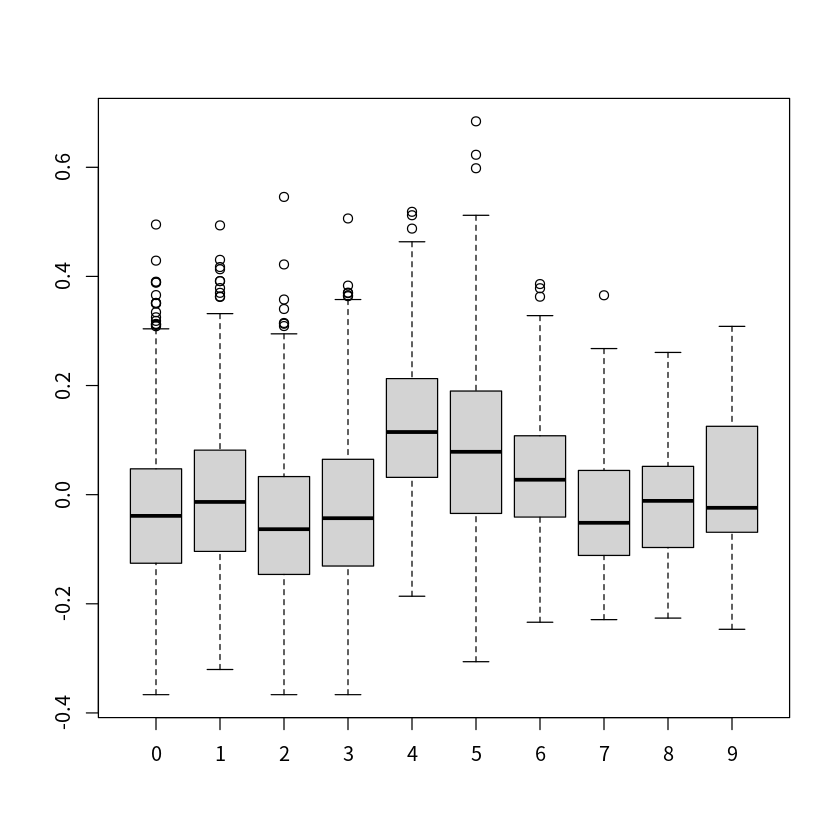

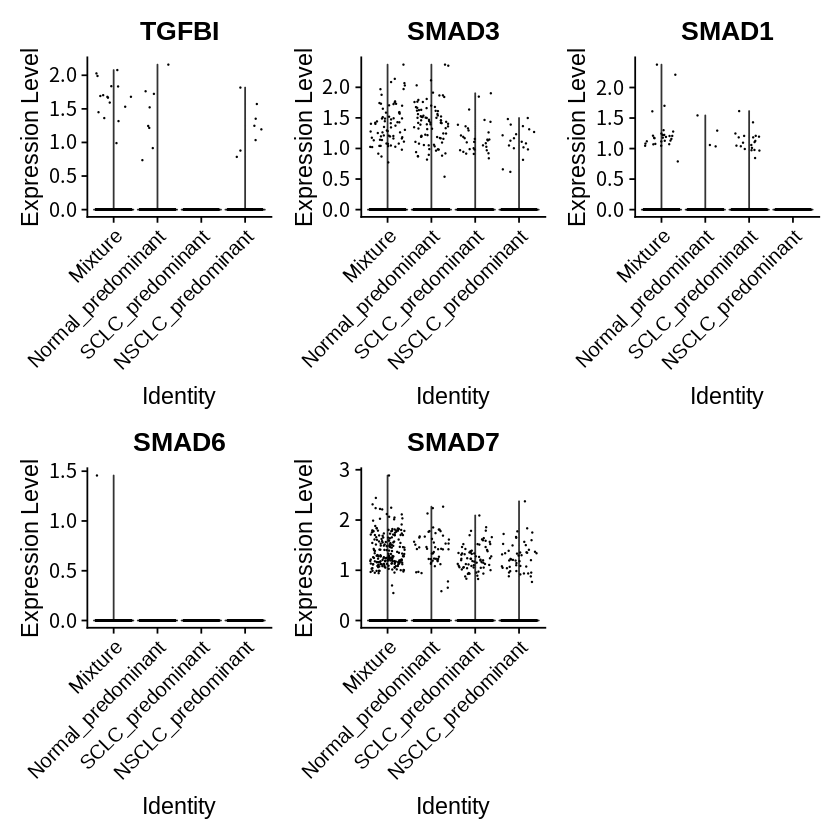

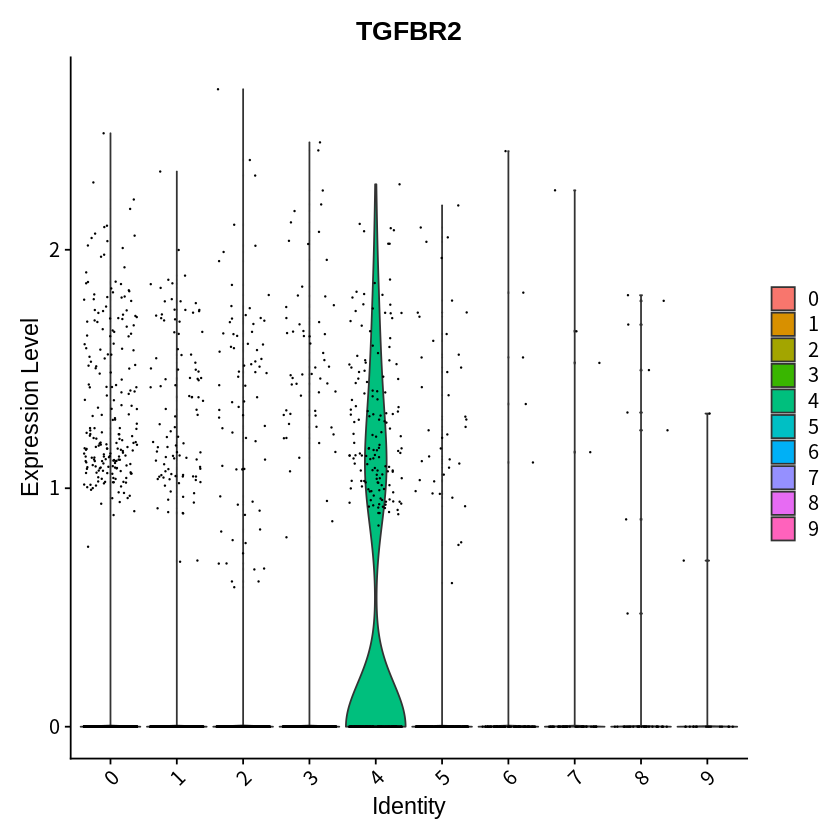

In [205]:
boxplot(box_res)

VlnPlot(NKcell,features=c("TGFBI","SMAD3","SMAD1","SMAD6","SMAD7"),group.by="mix_label")
VlnPlot(NKcell,features=c("TGFBR2"))

In [206]:
c("ACVR1","APC","ARID4B","BCAR3","BMP2","BMPR1A","BMPR2","CDH1","CDK9","CDKN1C","CTNNB1","ENG","FKBP1A","FNTA","FURIN","HDAC1","HIPK2",
  "ID1","ID2","ID3","IFNGR2","JUNB","KLF10","LEFTY2","LTBP2","MAP3K7","NCOR2","NOG","PMEPA1","PPM1A","PPP1CA","PPP1R15A","RAB31","RHOA",
  "SERPINE1","SKI","SKIL","SLC20A1","SMAD1","SMAD3","SMAD6","SMAD7","SMURF1","SMURF2","SPTBN1","TGFB1","TGFBR1","TGIF1","THBS1","TJP1",
  "TRIM33","UBE2D3","WWTR1","XIAP")-> TGFB_resp


inter_gene<-intersect(rownames(NKcell[["RNA"]]), TGFB_resp)
SCLC.NK <- ScaleData( NKcell , features = inter_gene)

unique(SCLC.NK@meta.data[,"seurat_clusters"])->cells

box_res=list()
for(cell in unique(cell_label))
{

print(cell)
sample =subset(SCLC.NK@meta.data, mix_label ==cell)
rownames(sample)->cell_name
colMeans(as.matrix(SCLC.NK[["RNA"]]@scale.data)[inter_gene, cell_name])->out
box_res[[cell]]<-out

}

Centering and scaling data matrix



[1] "Mixture"
[1] "Normal_predominant"
[1] "SCLC_predominant"
[1] "NSCLC_predominant"


In [208]:
str(box_res)
t.test(box_res$SCLC_predominant,box_res$NSCLC_predominant)   


List of 4
 $ Mixture           : Named num [1:2165] -0.087 -0.1084 0.0135 0.0277 0.0636 ...
  ..- attr(*, "names")= chr [1:2165] "AAACGGGTCGTATCAG_EBUS_19" "GCTCCTAAGTTTCCTT_BRONCHO_11" "TCCACACGTCGAAAGC_EBUS_19" "TTTATGCCATTTGCCC_EBUS_19" ...
 $ Normal_predominant: Named num [1:1385] 0.1852 0.2143 -0.0195 -0.262 -0.0362 ...
  ..- attr(*, "names")= chr [1:1385] "AAACCTGCAATCACAC_LN_11" "AACGTTGAGCCGCCTA_LN_07" "AACGTTGTCTTGTTTG_LN_11" "AAGTCTGAGCCCGAAA_LN_01" ...
 $ SCLC_predominant  : Named num [1:370] -0.179 0.0258 0.0295 0.0792 0.0139 ...
  ..- attr(*, "names")= chr [1:370] "TCGCGTTAGATGTGGC_EBUS_51" "S2_GCCAGCAGTAGACAAT-1" "S2_GGAGGATTCCCAGGCA-1" "S2_TACGTCCTCCACCCTA-1" ...
 $ NSCLC_predominant : Named num [1:373] -0.0759 0.4321 -0.1833 0.0656 -0.032 ...
  ..- attr(*, "names")= chr [1:373] "AATCGGTCACCTATCC_LN_02" "ACAGCCGTCGCTGATA_EBUS_12" "ACCAGTAGTCAGAATA_LN_03" "AGTAGTCCATCACGTA_LN_05" ...



	Welch Two Sample t-test

data:  box_res$SCLC_predominant and box_res$NSCLC_predominant
t = 3.3723, df = 703.01, p-value = 0.0007864
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01593541 0.06034808
sample estimates:
 mean of x  mean of y 
0.12280160 0.08465986 


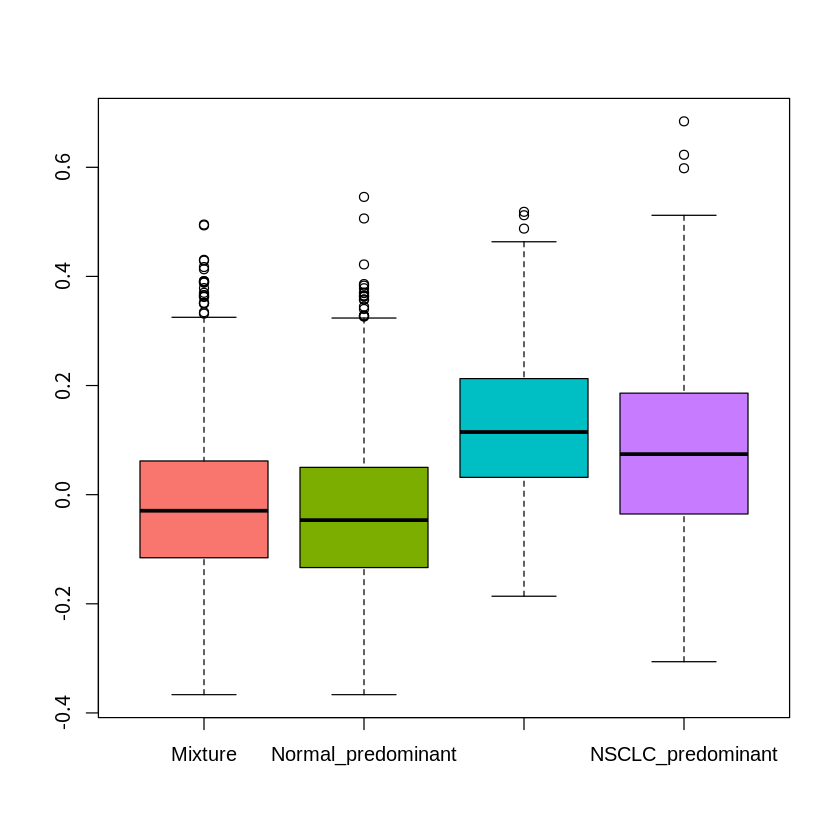

In [209]:
boxplot(box_res,col=c("#F8766D","#7CAE00","#00BFC4","#C77CFF"))

In [213]:
# save 
# save(NKcell, file = "data_out/5.NKcell.rdata")

In [5]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] cowplot_1.1.1         RColorBrewer_1.1-2    ggplot2_3.3.5        
 [4] clusterProfiler_4.2.1 org.Hs.eg.db_3.14.0   AnnotationDbi_1.56.2 
 [7] IRanges_2.28.0        S4Vectors_0.32.3      Biobase_2.54.0       
[10] BiocGenerics_0.40.0   harmony_0.1.0         Rcpp_1.0.7           
[13]